In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Ingestion

In [3]:
df = pd.read_csv('googleplaystore.csv')

### Data Preparation

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10017,TMJ4.com - WTMJ-TV Milwaukee,NEWS_AND_MAGAZINES,3.8,728,Varies with device,"50,000+",Free,0,Everyone 10+,News & Magazines,"July 5, 2018",Varies with device,Varies with device
5903,Ultrasound A-Z,FAMILY,4.5,112,39M,"10,000+",Free,0,Everyone,Education,"June 5, 2018",1.5,4.0 and up


In [9]:
df.shape

(10841, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
#statistical information about numerical value
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
#including categorical columns also
df.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.duplicated().sum()

483

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [17]:
#checking why Review column is object
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10358, dtype: object

In [18]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [19]:
df[~df.Reviews.str.isnumeric()]   #because of M, the whole column is represented as object

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
df.shape

(10358, 13)

In [21]:
df_copy = df.copy()
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [22]:
#resetting index after dropping the duplicate values
df_copy.reset_index(drop = True,inplace = True)

In [23]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [24]:
df_copy[~df_copy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [25]:
df_copy = df_copy.drop(df_copy.index[9990])

In [26]:
df_copy[~df_copy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [27]:
df_copy.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10353        38
10354         4
10355         3
10356       114
10357    398307
Name: Reviews, Length: 10357, dtype: object

In [28]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [29]:
df_copy['Reviews'].dtype

dtype('int32')

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int32  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [31]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [32]:
#converting Size dtype into int 
def size_conversion(size):
    if str(size)[-1] == 'M':
        res = float(str(size).replace('M',''))
        res = res * 1024
        return res
    elif str(size)[-1] == 'k':
        res = float(str(size).replace('k',''))
        return res
    else:
        return str(np.NaN)

In [33]:
df_copy['Size'] = df_copy.Size.apply(size_conversion)

In [34]:
df_copy.Size.unique()

array([19456.0, 14336.0, 8908.8, 25600.0, 2867.2, 5734.4, 29696.0,
       33792.0, 3174.4, 28672.0, 12288.0, 20480.0, 21504.0, 37888.0,
       2764.8, 5632.0, 17408.0, 39936.0, 31744.0, 4300.8, 7168.0, 23552.0,
       6144.0, 6246.4, 4710.4, 9420.8, 5324.8, 11264.0, 24576.0, 'nan',
       9625.6, 15360.0, 10240.0, 1228.8, 26624.0, 8192.0, 8089.6, 57344.0,
       58368.0, 35840.0, 55296.0, 201.0, 3686.4, 5836.8, 8806.4, 2457.6,
       27648.0, 2560.0, 16384.0, 3481.6, 9113.6, 3993.6, 2969.6, 38912.0,
       32768.0, 5529.6, 18432.0, 1126.4, 2252.8, 4608.0, 10035.2, 53248.0,
       9216.0, 6860.8, 30720.0, 2662.4, 7270.4, 3788.8, 22528.0, 7577.6,
       6553.6, 3276.8, 8396.8, 10137.6, 5017.6, 9728.0, 5120.0, 6041.6,
       13312.0, 74752.0, 6963.2, 3584.0, 4096.0, 2355.2, 7372.8, 2150.4,
       43008.0, 7475.2, 9318.4, 56320.0, 23.0, 6656.0, 1536.0, 7680.0,
       52224.0, 41984.0, 49152.0, 8704.0, 47104.0, 8499.2, 4403.2, 4812.8,
       3379.2, 40960.0, 7987.2, 9011.2, 6758.4, 5222.4, 

In [35]:
df_copy.Size.dtype

dtype('O')

In [36]:
df_copy['Size'] = df_copy.Size.astype(float)

In [37]:
df_copy.Size.dtype

dtype('float64')

In [38]:
df_copy.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10353         5,000+
10354           100+
10355         1,000+
10356         1,000+
10357    10,000,000+
Name: Installs, Length: 10357, dtype: object

In [39]:
df_copy['Installs'] = df_copy['Installs'].str.replace('+','').str.replace(',','')

In [40]:
df_copy.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10353        5000
10354         100
10355        1000
10356        1000
10357    10000000
Name: Installs, Length: 10357, dtype: object

In [41]:
df_copy['Installs'] = df_copy['Installs'].astype(int)

In [42]:
df_copy['Installs'].dtypes

dtype('int32')

In [43]:
df_copy.Price

0        0
1        0
2        0
3        0
4        0
        ..
10353    0
10354    0
10355    0
10356    0
10357    0
Name: Price, Length: 10357, dtype: object

In [44]:
df_copy.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [45]:
df_copy['Price'] = df_copy.Price.str.replace('$','')

In [46]:
df_copy.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [47]:
df_copy['Price'] = df_copy.Price.astype(float)

In [48]:
df_copy.Price.dtypes

dtype('float64')

In [49]:
df_copy['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10353       July 25, 2017
10354        July 6, 2018
10355    January 20, 2017
10356    January 19, 2015
10357       July 25, 2018
Name: Last Updated, Length: 10357, dtype: object

In [50]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [51]:
df_copy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10353   2017-07-25
10354   2018-07-06
10355   2017-01-20
10356   2015-01-19
10357   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

In [52]:
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year
df_copy.drop('Last Updated',axis = 1,inplace = True)

In [53]:
df_copy.T

,0,1,2,3,4,5,6,7,8,9,...,10348,10349,10350,10351,10352,10353,10354,10355,10356,10357
App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Sketch - Draw & Paint,Pixel Draw - Number Art Coloring Book,Paper flowers instructions,Smoke Effect Photo Maker - Smoke Editor,Infinite Painter,Garden Coloring Book,Kids Paint Free - Drawing Fun,...,payermonstationnement.fr,FR Tides,Chemin (fr),FR Calculator,FR Forms,Sya9a Maroc - FR,Fr. Mike Schmitz Audio Teachings,Parkinson Exercices FR,The SCP Foundation DB fr nn5n,iHoroscope - 2018 Daily Horoscope & Astrology
Category,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,...,MAPS_AND_NAVIGATION,WEATHER,BOOKS_AND_REFERENCE,FAMILY,BUSINESS,FAMILY,FAMILY,MEDICAL,BOOKS_AND_REFERENCE,LIFESTYLE
Rating,4.1,3.9,4.7,4.5,4.3,4.4,3.8,4.1,4.4,4.7,...,NaN,3.8,4.8,4.0,NaN,4.5,5.0,NaN,4.5,4.5
Reviews,159,967,87510,215644,967,167,178,36815,13791,121,...,38,1195,44,7,0,38,4,3,114,398307
Size,19456.0,14336.0,8908.8,25600.0,2867.2,5734.4,19456.0,29696.0,33792.0,3174.4,...,10035.2,582.0,619.0,2662.4,9830.4,54272.0,3686.4,9728.0,NaN,19456.0
Installs,10000,500000,5000000,50000000,100000,50000,50000,1000000,1000000,10000,...,5000,100000,1000,500,10,5000,100,1000,1000,10000000
Type,Free,Free,Free,Free,Free,Free,Free,Free,Free,Free,...,Free,Free,Free,Free,Free,Free,Free,Free,Free,Free
Price,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Content Rating,Everyone,Everyone,Everyone,Teen,Everyone,Everyone,Everyone,Everyone,Everyone,Everyone,...,Everyone,Everyone,Everyone,Everyone,Everyone,Everyone,Everyone,Everyone,Mature 17+,Everyone
Genres,Art & Design,Art & Design;Pretend Play,Art & Design,Art & Design,Art & Design;Creativity,Art & Design,Art & Design,Art & Design,Art & Design,Art & Design;Creativity,...,Maps & Navigation,Weather,Books & Reference,Education,Business,Education,Education,Medical,Books & Reference,Lifestyle


In [54]:
df_copy['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10353            4.1 and up
10354            4.1 and up
10355            2.2 and up
10356    Varies with device
10357    Varies with device
Name: Android Ver, Length: 10357, dtype: object

In [55]:
df_copy['Android Ver'].unique()   #do yourself

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [56]:
df_copy['Android Ver'] = df_copy['Android Ver'].str.replace('and up','').str.replace('Varies with device','').str.replace('W','')

In [57]:
df_copy['Android Ver'].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       '', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ', '5.1 ',
       '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '7.1 ', '7.0 - 7.1.1',
       '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ', '4.1 - 7.1.1', nan,
       '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

In [58]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [59]:
df_copy.App

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10353                                     Sya9a Maroc - FR
10354                     Fr. Mike Schmitz Audio Teachings
10355                               Parkinson Exercices FR
10356                        The SCP Foundation DB fr nn5n
10357        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10357, dtype: object

In [60]:
df_copy[df_copy.App.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
260,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,4.0.3,26,2,2018
261,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35840.0,100000000,Free,0.0,Everyone,Business,9.7.14188,4.1,2,8,2018
262,Slack,BUSINESS,4.4,51510,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,,2,8,2018
348,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1000000000,Free,0.0,Everyone,Communication,Varies with device,,1,8,2018
349,imo free video calls and chat,COMMUNICATION,4.3,4785988,11264.0,500000000,Free,0.0,Everyone,Communication,9.8.000000010501,4.0,8,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10165,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,NaN,100000000,Free,0.0,Everyone,Video Players & Editors,Varies with device,,2,5,2018
10233,FarmersOnly Dating,DATING,3.0,1145,1433.6,100000,Free,0.0,Mature 17+,Dating,2.2,4.0,25,2,2016
10238,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4096.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0,6,7,2018
10248,FP Notebook,MEDICAL,4.5,410,61440.0,50000,Free,0.0,Everyone,Medical,2.1.0.372,4.4,24,3,2018


In [61]:
df_copy = df_copy.drop_duplicates(subset = ['App'],keep = 'first')

In [62]:
df_copy[df_copy.App.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year


In [63]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [64]:
df_copy.shape

(9659, 15)

In [65]:
df_copy.reset_index(drop = True,inplace = True)

In [66]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1,25,7,2017
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,1.0,4.1,6,7,2018
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2,20,1,2017
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,,19,1,2015


### Exploratory Data Analysis

In [68]:
#seperating categorical and numerical columns

categorical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype =='O']

In [69]:
categorical_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [70]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

In [71]:
numerical_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [72]:
df_copy[categorical_feature]

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4
...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,1.48,4.1
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,1.0,4.1
9656,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,1.0,2.2
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,Varies with device,


In [73]:
df_copy.Type.value_counts(normalize = True)*100

Type
Free    92.172292
Paid     7.827708
Name: proportion, dtype: float64

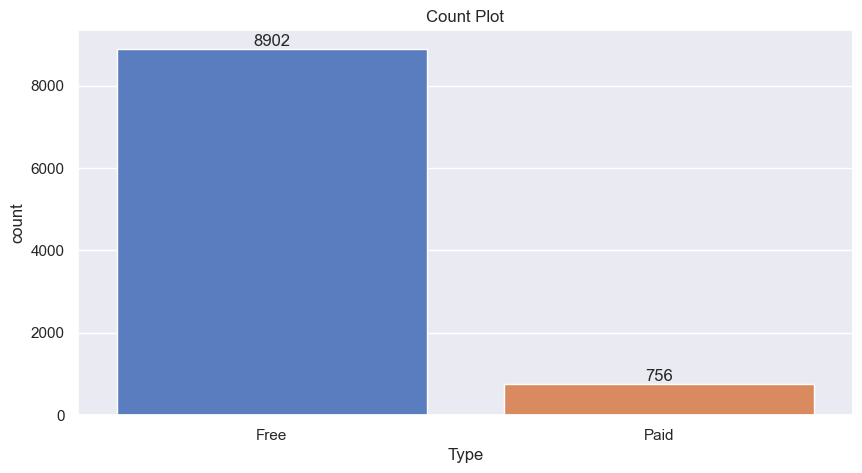

In [173]:
plot = sns.countplot(x = 'Type',data = df_copy,palette = 'muted')

for bars in plot.containers:
    plot.bar_label(bars)

plt.title('Count Plot')
plt.show()

***From the above graph it is clear that, there are more number of free apps as compared to paid.*** 

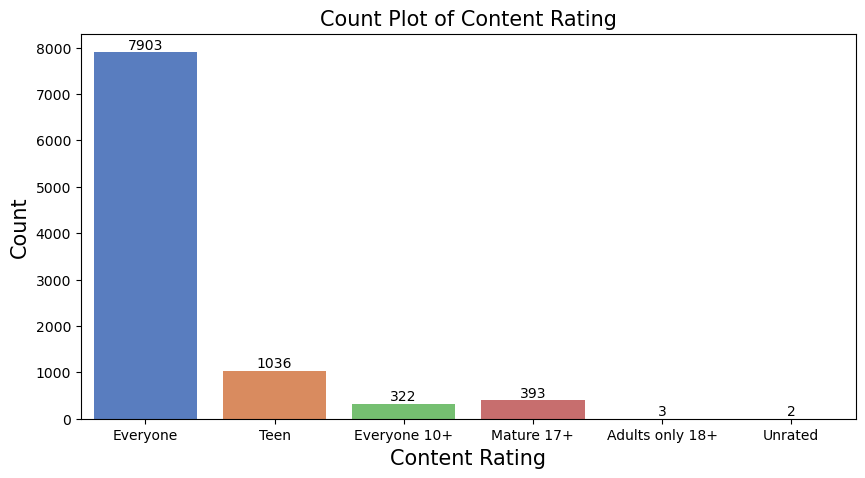

In [75]:
plt.figure(figsize = (10,5))
Con_rate = sns.countplot(x = 'Content Rating',data = df_copy,palette = 'muted')
for bars in Con_rate.containers:
    Con_rate.bar_label(bars)

plt.title('Count Plot of Content Rating',fontsize = 15)
plt.xlabel('Content Rating',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [76]:
df_copy.Category.value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

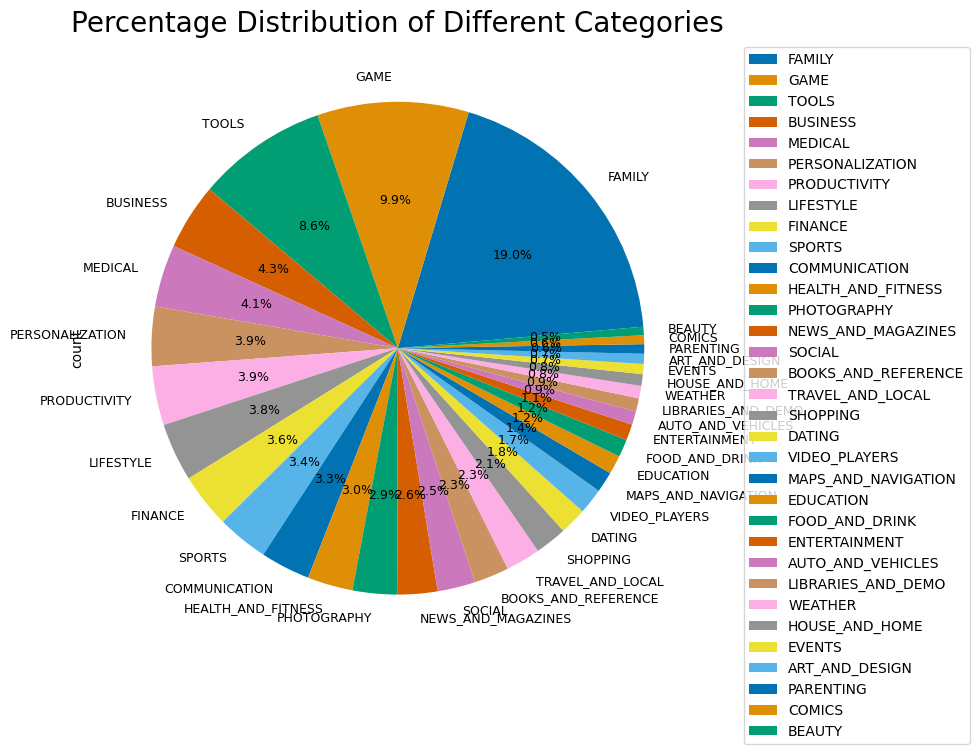

In [77]:
plt.figure(figsize = (10,8))
df_copy.Category.value_counts().plot.pie(y = df_copy['Category'],autopct = '%0.1f%%',startangle = 5,textprops = {'fontsize' : 9},colors=sns.color_palette('colorblind'))
plt.title('Percentage Distribution of Different Categories',fontsize = 20,)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

***Most of the apps are related to Family Category and least are related to Beauty Category.***

In [78]:
df_copy['Genres'].value_counts().head(10)

Genres
Tools              826
Entertainment      561
Education          510
Business           420
Medical            395
Personalization    376
Productivity       374
Lifestyle          368
Finance            345
Sports             331
Name: count, dtype: int64

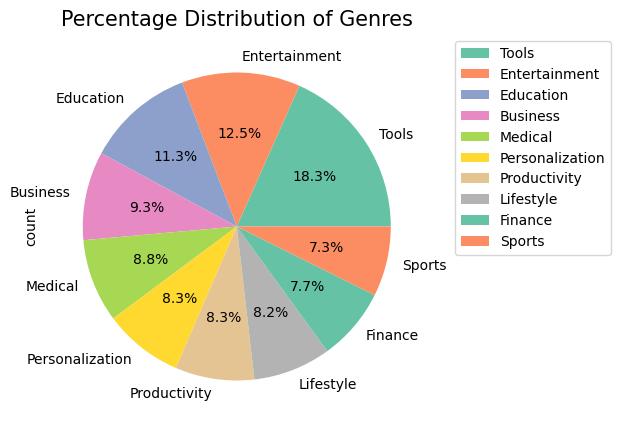

In [79]:
df_copy['Genres'].value_counts().head(10).plot.pie(y = df_copy['Genres'],autopct = '%0.1f%%',figsize = (12,5),textprops = {'fontsize' : 10},colors=sns.color_palette('Set2'))
plt.title('Percentage Distribution of Genres',fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1),loc = 'upper left')
plt.show()

***From the above graph it is clear that, maximum apps are from Tools Genres.***

## Insights

In [81]:
df_copy[numerical_feature]

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19456.0,10000,0.0,7,1,2018
1,3.9,967,14336.0,500000,0.0,15,1,2018
2,4.7,87510,8908.8,5000000,0.0,1,8,2018
3,4.5,215644,25600.0,50000000,0.0,8,6,2018
4,4.3,967,2867.2,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
9654,4.5,38,54272.0,5000,0.0,25,7,2017
9655,5.0,4,3686.4,100,0.0,6,7,2018
9656,NaN,3,9728.0,1000,0.0,20,1,2017
9657,4.5,114,NaN,1000,0.0,19,1,2015


**Q1Which is the most popular category?**

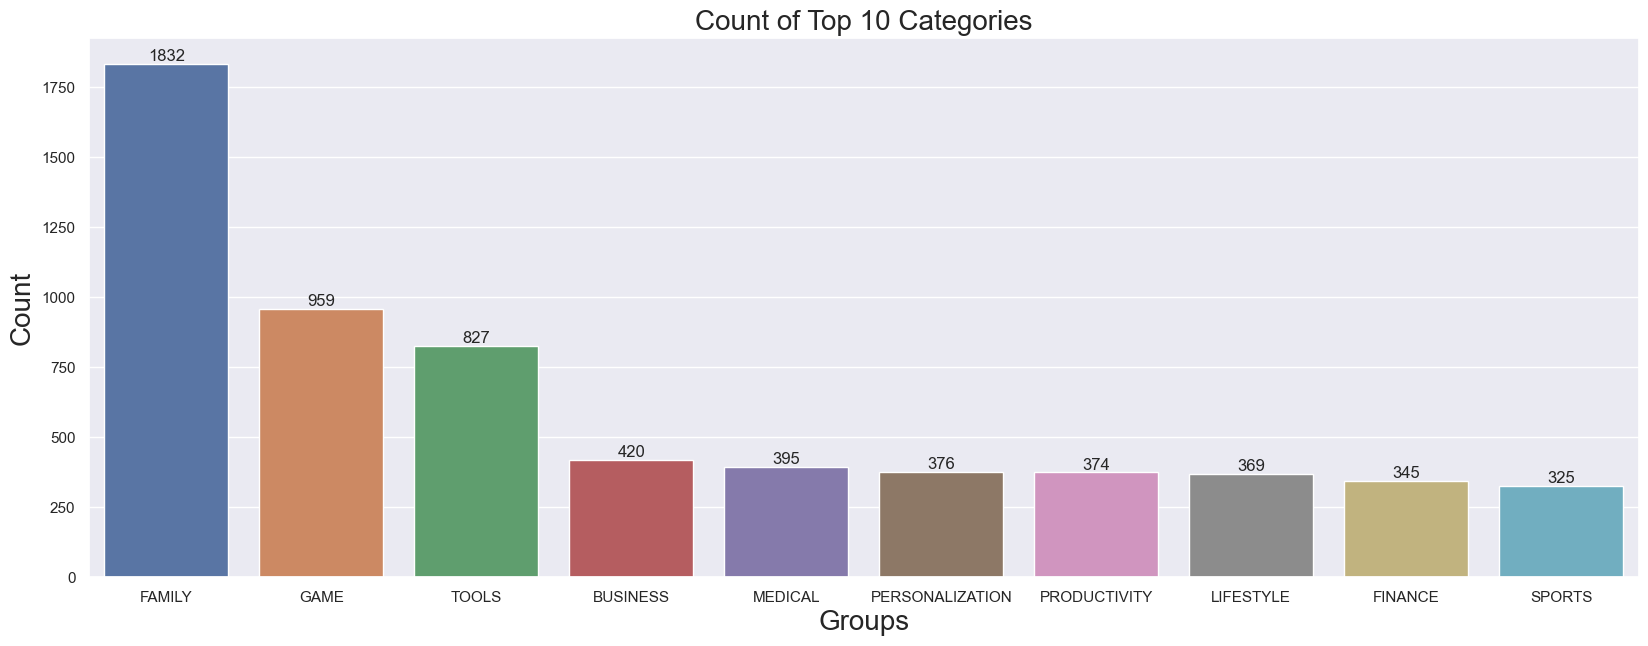

In [83]:
cat = df_copy['Category'].value_counts()[:10]
category = cat.reset_index()
category.columns = ['Groups','Count'] 

sns.set(rc = {'figure.figsize':(20,7)})
count = sns.barplot(category,x = category['Groups'], y = category['Count'],palette = 'deep')

for bars in count.containers:
    count.bar_label(bars)

plt.title('Count of Top 10 Categories',fontsize = 20)
plt.xlabel('Groups',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

***From the above graph it is clear that Family Category is the most popular category.***

**Q2) Which category has the maximum number of installations?**

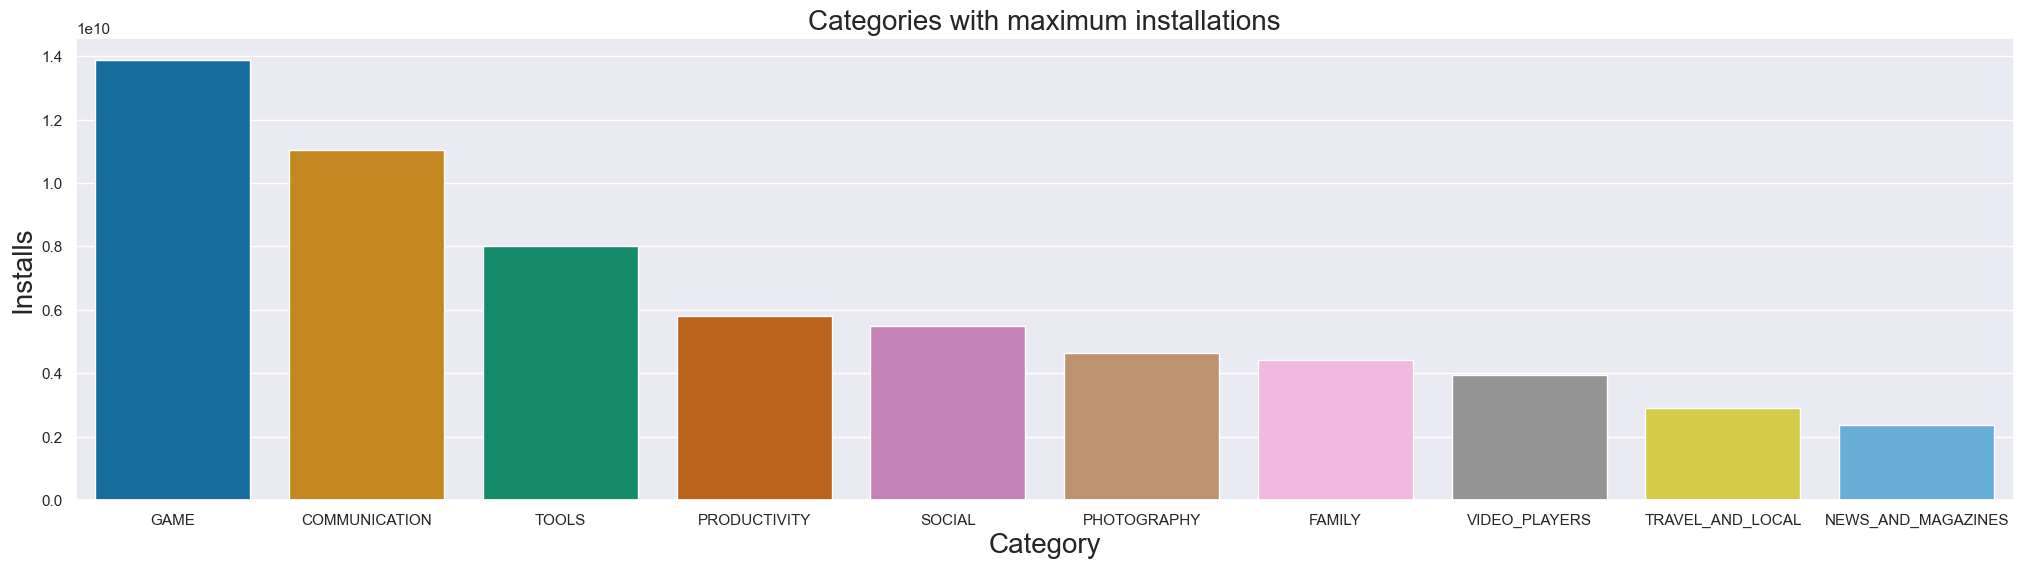

In [85]:
Cat_install = df_copy.groupby(['Category'],as_index = False)['Installs'].sum().sort_values(by = 'Installs',ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (25,6)})
sns.barplot(data = Cat_install,x = 'Category',y = 'Installs',palette = 'colorblind')

plt.title('Categories with maximum installations',fontsize = 20)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Installs',fontsize = 20)
plt.show()

***Game Category has maximum number of installations.***  

**Q3) Which category app users are reviewing the most?**

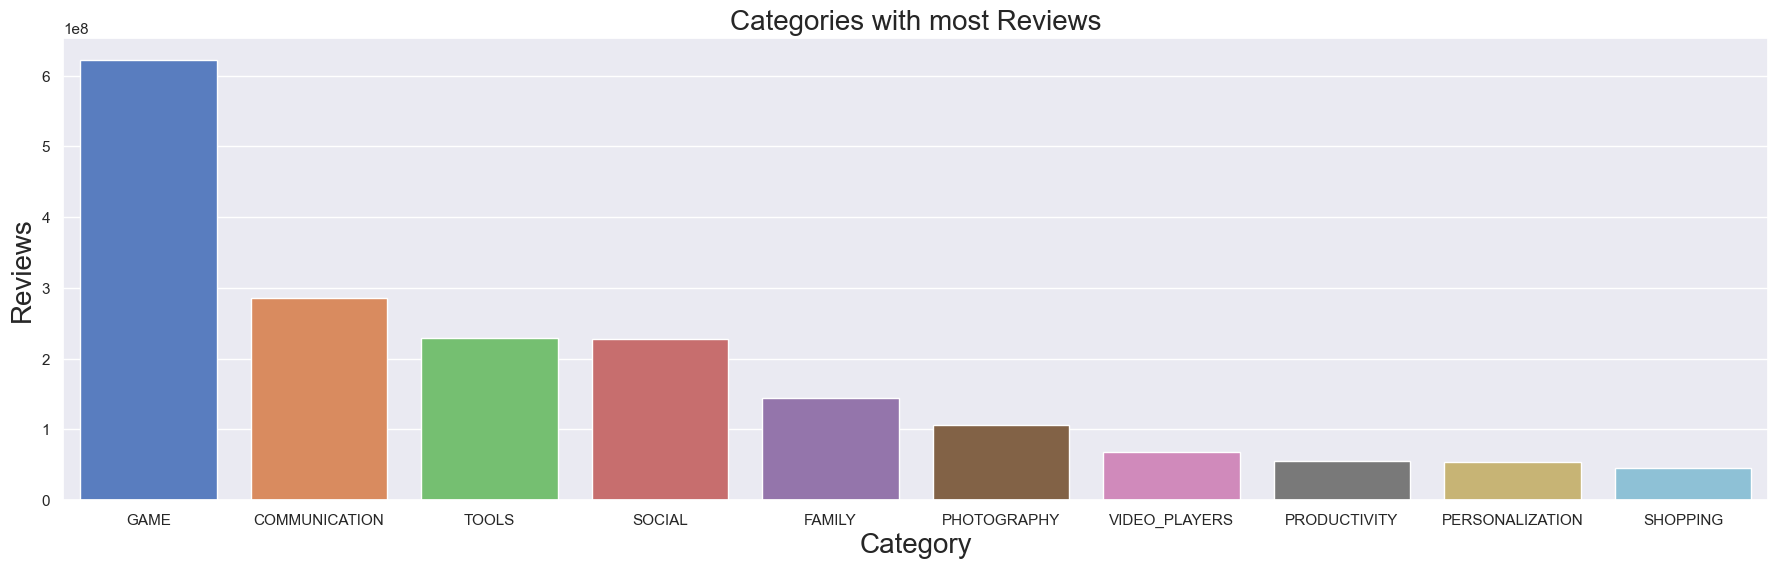

In [87]:
Cat_install = df_copy.groupby(['Category'],as_index = False)['Reviews'].sum().sort_values(by = 'Reviews',ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (22,6)})
sns.barplot(data = Cat_install,x = 'Category',y = 'Reviews',palette = 'muted')

plt.title('Categories with most Reviews',fontsize = 20)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Reviews',fontsize = 20)
plt.show()

***Game Category App are getting the maximum number of reviews.***

**Q4) In which year there are maximum number of installations?**

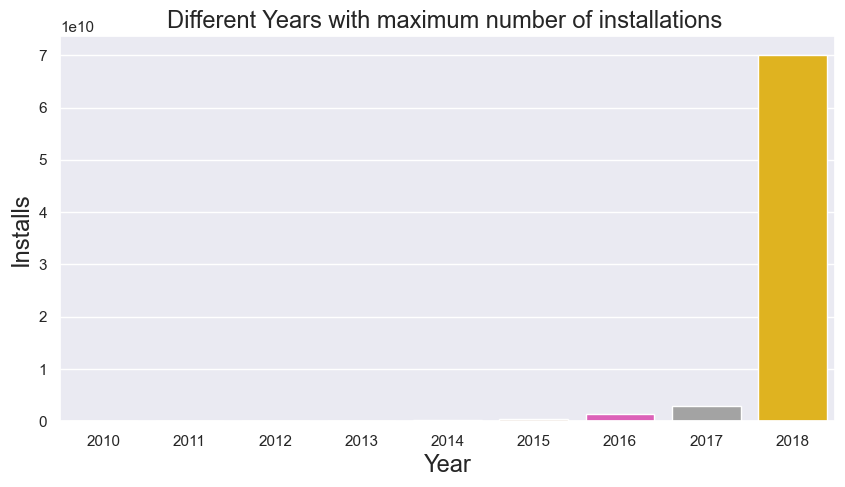

In [171]:
year_install = df_copy.groupby(['Year'], as_index = False)['Installs'].sum().sort_values(by = 'Installs',ascending = False).head(10)

sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(data = year_install,x = 'Year',y = 'Installs',palette = 'bright')

plt.title('Different Years with maximum number of installations ',fontsize = 17)
plt.xlabel('Year',fontsize = 17)
plt.ylabel('Installs',fontsize = 17)
plt.show()

***From the above bar graph it is clear that the maximum number of installations are in the year 2018.***

***Conclusion - In the year 2018, Games Category Apps are installed more and also reviewed more as compared to other apps but the most popular category is Family Category.***

# Project Completed